# Classification Project - Mobile Price
# Random Forest, SVM, Decision Trees Algorithm

# Firstly import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
filterwarnings("ignore")

# Import Datasets

In [4]:
Training_Dataset=pd.read_csv("E:\Momeni-Machne Learning class momeni 21 01 1402\Machine Learning\zahra\session 30/train.csv")


In [5]:
NoneLabel_Dataset=pd.read_csv(r'E:\Momeni-Machne Learning class momeni 21 01 1402\Machine Learning\zahra\session 30/test2.csv')

In [6]:
df_train=pd.DataFrame(Training_Dataset)
df_test=pd.DataFrame(NoneLabel_Dataset)

In [7]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Preprocessing 

In [8]:
# In This project we have 2 dataset(train & test)
# which Test dataset dont have taget value(y)
# we want to use train test to find y for test data
# for this, we should compare describe of both to check the range of changes of theri variables
# that shoub be the same ..like min,max,average
# so chk feature by featue all of items in describe

In [9]:
df_train.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df_test.describe(include='all')

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [11]:
print(df_train.isnull().sum())
print("T here isn't any missing values")

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
T here isn't any missing values


In [12]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Drawing Scatter plots of all features with our target(Price range) separately

Text(0, 0.5, 'price range')

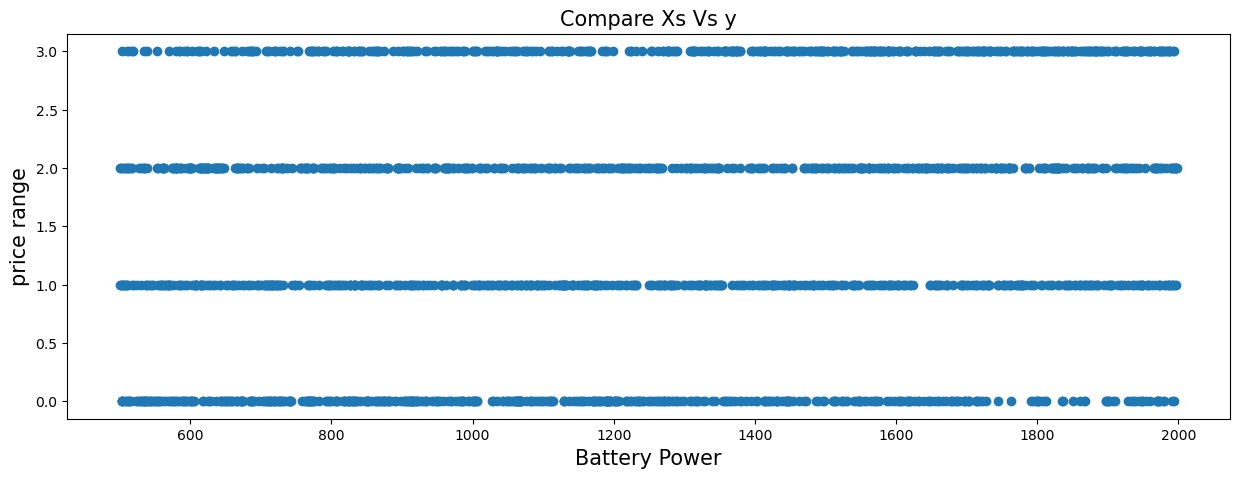

In [13]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['battery_power'],df_train['price_range'])
plt.title("Compare Xs Vs y",fontsize=15)
plt.xlabel("Battery Power",fontsize=15)
plt.ylabel("price range",fontsize=15)

Text(0, 0.5, 'price range')

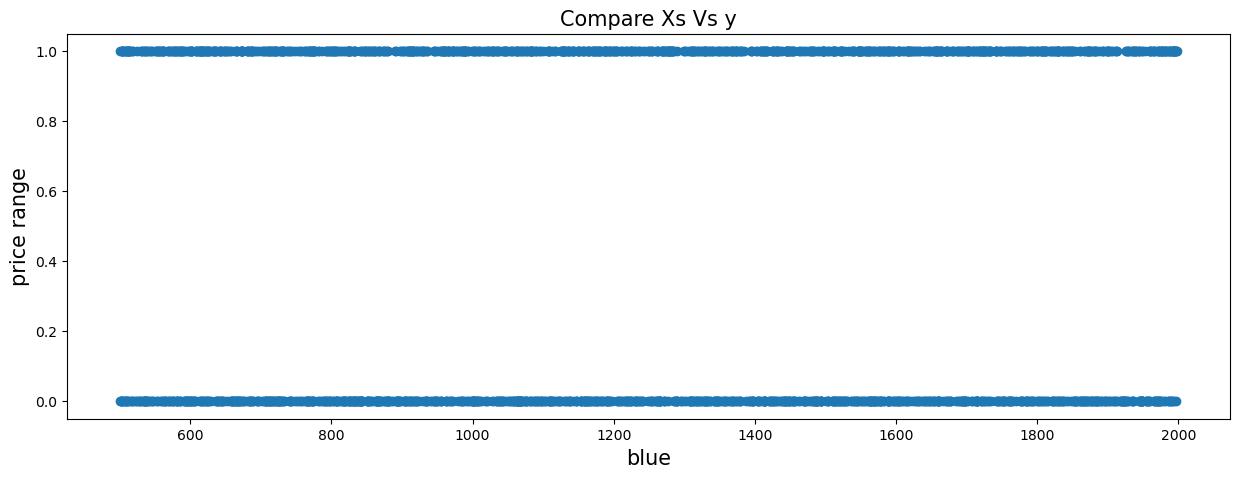

In [14]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['battery_power'],df_train['blue'])
plt.title("Compare Xs Vs y",fontsize=15)
plt.xlabel("blue",fontsize=15)
plt.ylabel("price range",fontsize=15)

Text(0, 0.5, 'price range')

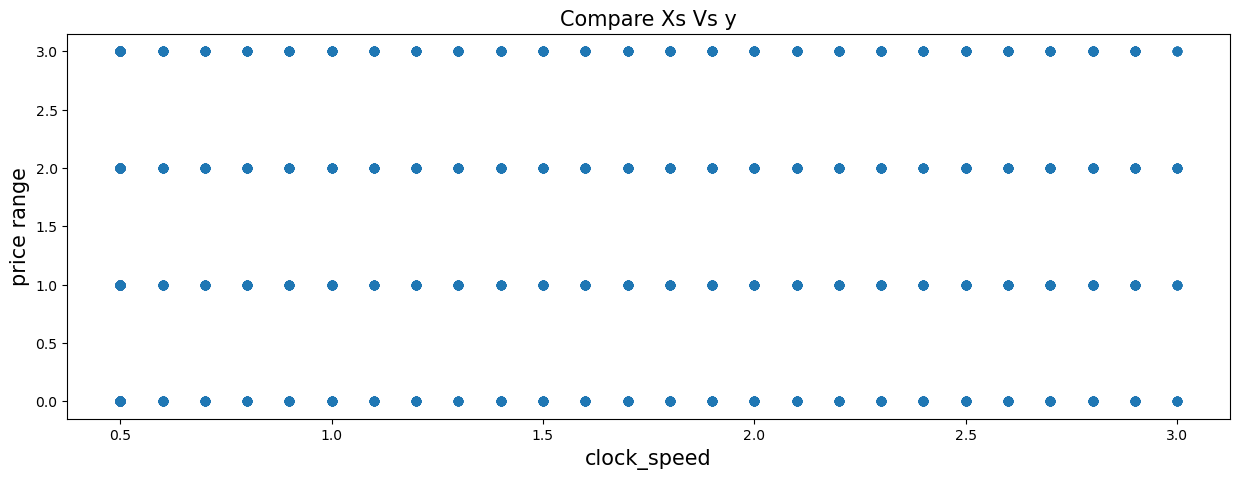

In [15]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['clock_speed'],df_train['price_range'])
plt.title("Compare Xs Vs y",fontsize=15)
plt.xlabel("clock_speed",fontsize=15)
plt.ylabel("price range",fontsize=15)

Text(0, 0.5, 'price range')

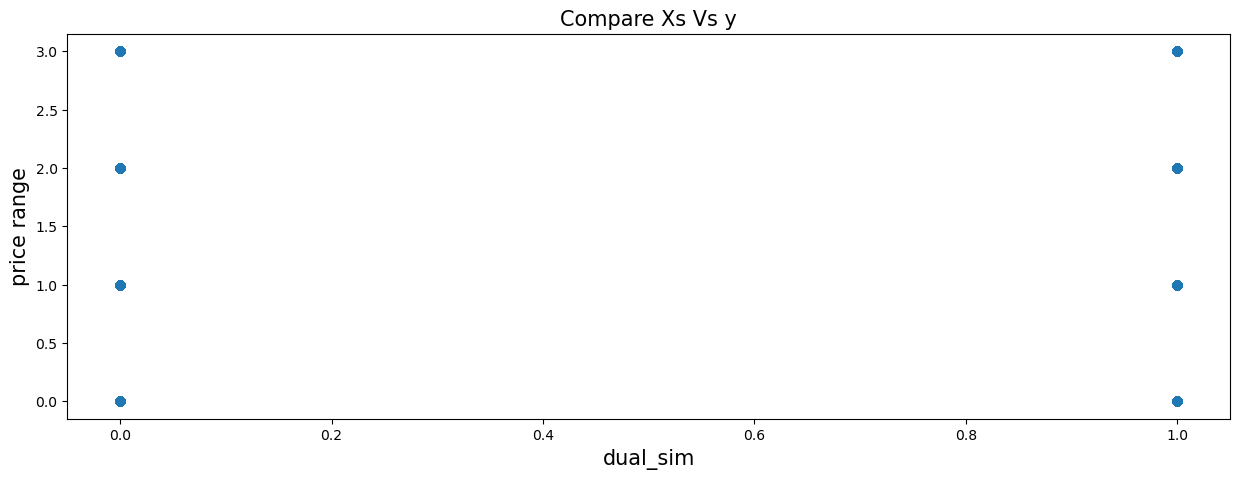

In [16]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['dual_sim'],df_train['price_range'])
plt.title("Compare Xs Vs y",fontsize=15)
plt.xlabel("dual_sim",fontsize=15)
plt.ylabel("price range",fontsize=15)

Text(0, 0.5, 'price range')

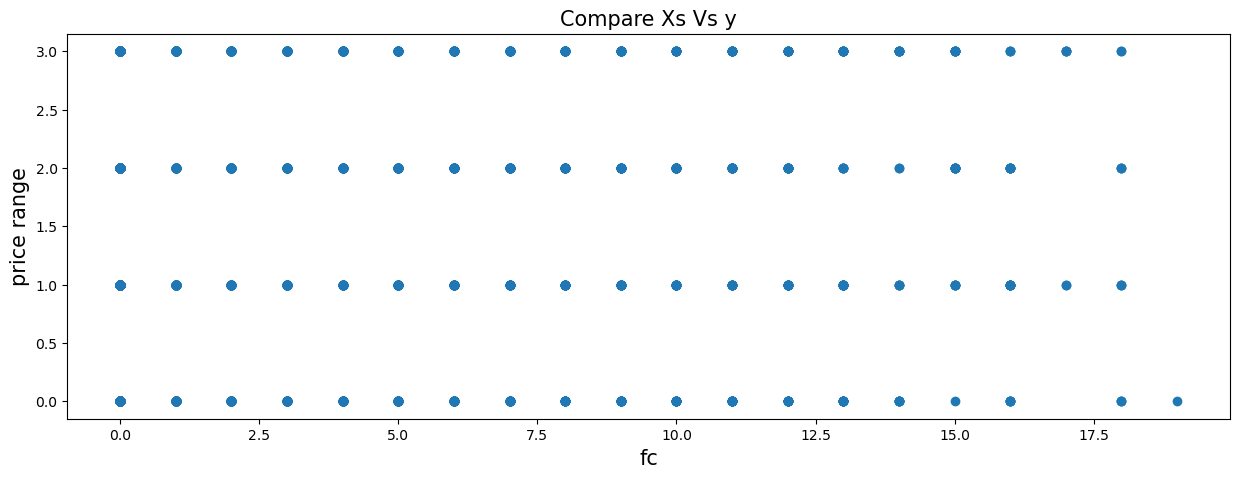

In [17]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['fc'],df_train['price_range'])
plt.title("Compare Xs Vs y",fontsize=15)
plt.xlabel("fc",fontsize=15)
plt.ylabel("price range",fontsize=15)

Text(0, 0.5, 'price range')

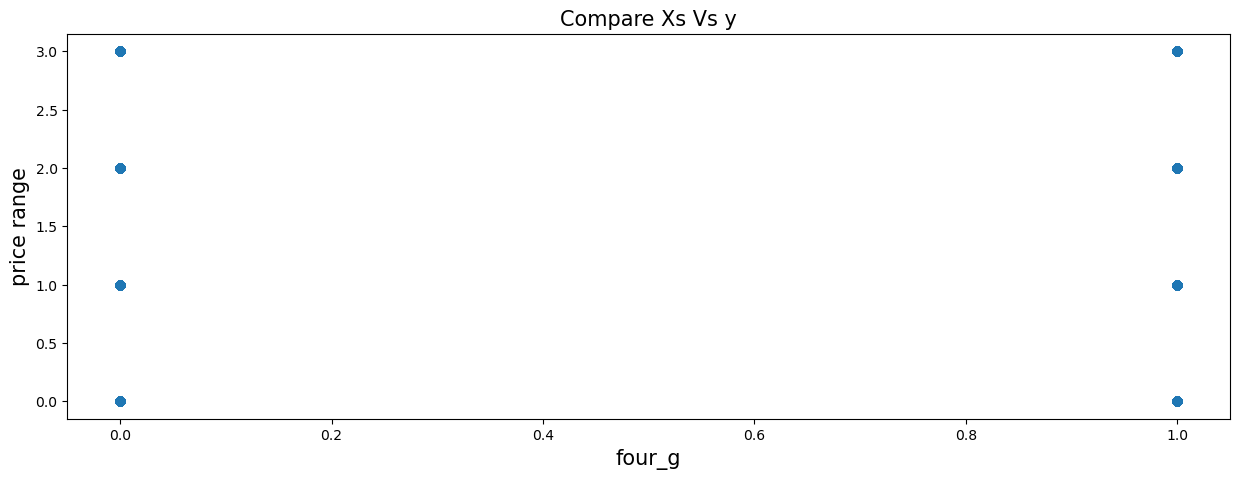

In [18]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['four_g'],df_train['price_range'])
plt.title("Compare Xs Vs y",fontsize=15)
plt.xlabel("four_g",fontsize=15)
plt.ylabel("price range",fontsize=15)

Text(0, 0.5, 'price range')

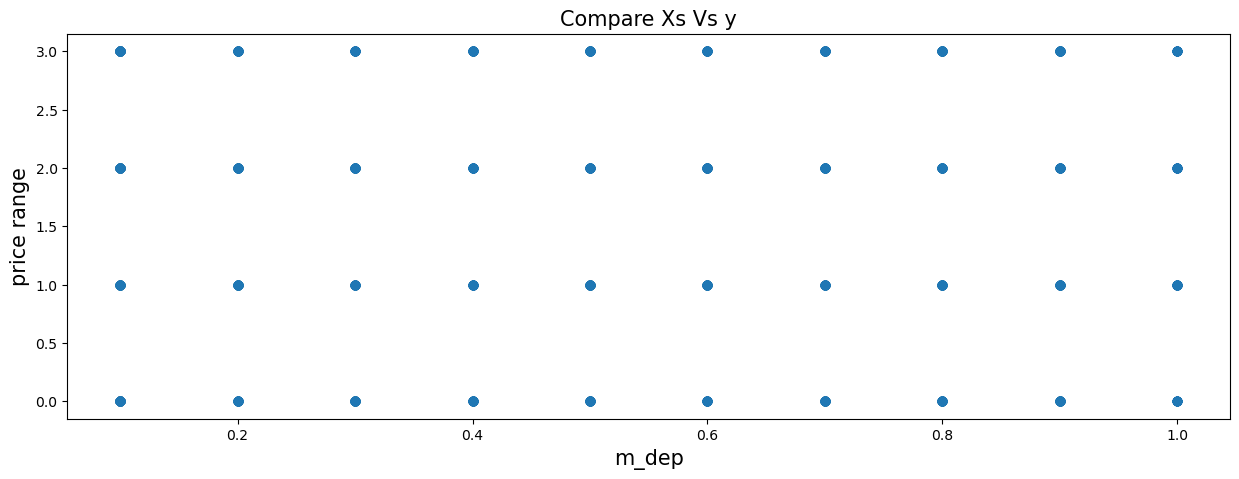

In [19]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['m_dep'],df_train['price_range'])
plt.title("Compare Xs Vs y",fontsize=15)
plt.xlabel("m_dep",fontsize=15)
plt.ylabel("price range",fontsize=15)

Text(0, 0.5, 'price range')

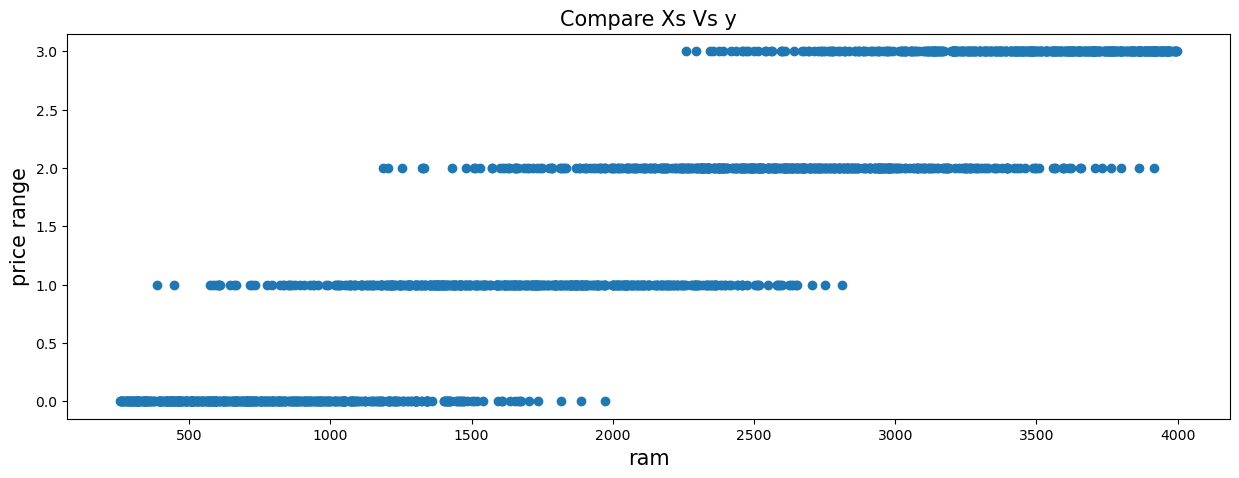

In [20]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['ram'],df_train['price_range'])
plt.title("Compare Xs Vs y",fontsize=15)
plt.xlabel("ram",fontsize=15)
plt.ylabel("price range",fontsize=15)

# All scatter did not give me nay special information except "ram"
# we can check it by correlation also.

# we can also check joint plot to get any useful info 

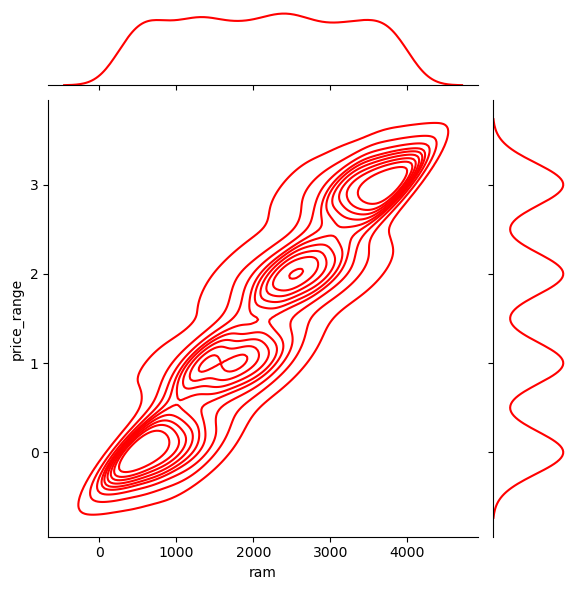

In [21]:
sns.jointplot(x='ram',y='price_range',data=df_train,color='red',kind='kde')

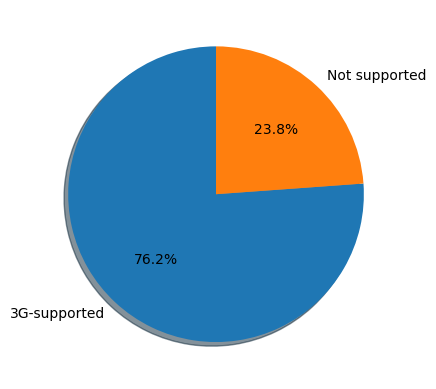

In [22]:
labels=["3G-supported",'Not supported']
values=df_train['three_g'].value_counts().values

figl, axl=plt.subplots()
axl.pie(values,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

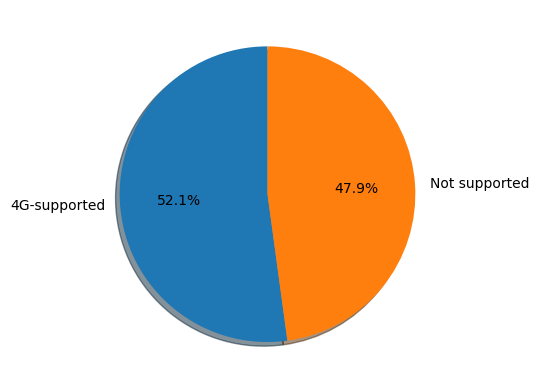

In [23]:
labels=["4G-supported",'Not supported']
values=df_train['four_g'].value_counts().values

figl, axl=plt.subplots()
axl.pie(values,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

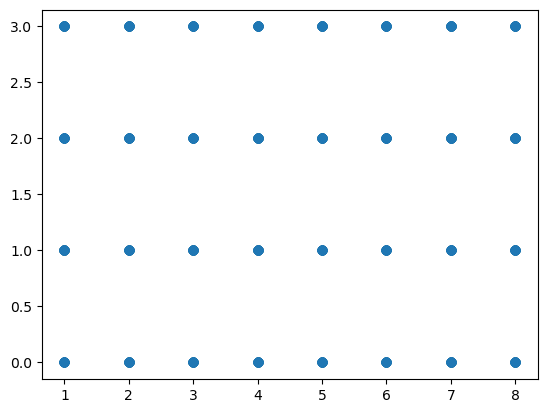

In [24]:
plt.scatter(df_train['n_cores'],df_train["price_range"])

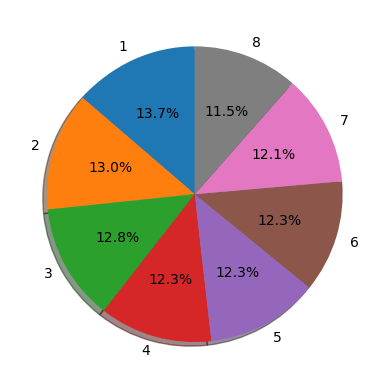

In [25]:
labels4g=['1','2','3','4','5','6','7','8']
values4g=df_train['n_cores'].value_counts().values

figl, axl=plt.subplots()
axl.pie(values4g,labels=labels4g, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [26]:
# we apply some changws on some features 

In [27]:
df=df_train[df_train['sc_w']>=2]
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1606,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1607,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1608,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [28]:
df_final_train =df[df['px_height']!=0]
df_final_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1606,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1607,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1608,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [29]:
# it shoud be apply on DF_test also 

In [30]:
df2=df_test[df_test['sc_w']>=2]
df2.reset_index(inplace=True)
df2.drop('index',axis=1,inplace=True)
df2.drop('id',axis=1,inplace=True)
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
2,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
4,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,567,1,2.7,1,14,1,56,0.4,165,8,17,555,1290,336,7,6,7,1,1,1
785,936,1,1.4,1,0,0,46,0.8,139,2,0,265,886,684,8,5,12,1,1,1
786,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
787,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [31]:
df2_final_test =df2[df2['px_height']!=0]
print(df2_final_test.isnull().sum())
print("There isn't any missing values")

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64
There isn't any missing values


# Model

# Decision Trees (DTs)

In [32]:
Xd=df_final_train.drop ('price_range',axis=1,)
yd=df_final_train.price_range.values.reshape(-1,1)

In [33]:
def DTs (Xd,yd,Testsize,mdepth):
    df_evaluation=pd.DataFrame()
    for x in Testsize:
        X_train,X_test,y_train,y_test= train_test_split(Xd,yd,test_size=x,random_state=0)
        for maxdepth in mdepth:
            clf=DecisionTreeClassifier(max_depth=maxdepth)
            clf=clf.fit(X_train,y_train)
            y_pred=clf.predict(X_test)
            dict={'Test_size':x,'Max_depth':maxdepth, 'acc':metrics.accuracy_score(y_test,y_pred),"score":clf.score(Xd,yd)}
            df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (df_evaluation)

# THis function highlights maximum values

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
    

In [34]:
df_evaluation=DTs (Xd,yd,[.1,.15,.2,.25,.3],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
df_evaluation.style.apply(highlight_max)

,Test_size,Max_depth,acc,score
0,0.100000,1.000000,0.521739,0.497203
1,0.100000,2.000000,0.776398,0.766314
2,0.100000,3.000000,0.788820,0.775637
3,0.100000,4.000000,0.832298,0.838409
4,0.100000,5.000000,0.819876,0.882536
5,0.100000,6.000000,0.807453,0.914232
6,0.100000,7.000000,0.795031,0.939093
7,0.100000,8.000000,0.863354,0.965817
8,0.100000,9.000000,0.844720,0.971411
9,0.100000,10.000000,0.857143,0.981355


In [35]:
# in depth 19, testsize .1 have higher score so we select this to our model 
X_train,X_test,y_train,y_test= train_test_split(Xd,yd,test_size=.1,random_state=0)


In [36]:
clf=DecisionTreeClassifier(max_depth=19,criterion='entropy')
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [37]:
print('Accuracy= ', metrics.accuracy_score(y_test,y_pred))

Accuracy=  0.8260869565217391


# RF

In [38]:
Xr=df_final_train.drop('price_range',axis=1,)
yr=df_final_train.price_range.values.reshape(-1,1)

In [39]:
def RandomForest (Xr,yr,Testsize,mdepth):
    df_evaluation=pd.DataFrame()
    for x in Testsize:
        X_train,X_test,y_train,y_test= train_test_split(Xr,yr,test_size=x,random_state=0)
        for maxdepth in mdepth:
            RF=RandomForestClassifier(max_depth=maxdepth,criterion='entropy')
            RF.fit(X_train,y_train)
            y_pred=RF.predict(X_test)
            dict={'Test_size':x,'Max_depth':maxdepth, 'acc':metrics.accuracy_score(y_test,y_pred),"score":RF.score(Xr,yr)}
            df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (df_evaluation)

# THis function highlights maximum values

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
    

In [40]:
df_evaluation=RandomForest (Xr,yr,[.1,.15,.2,.25,.3],[9,10,11,12,13,14,15,16,17,18,19,20])
df_evaluation.style.apply(highlight_max)

,Test_size,Max_depth,acc,score
0,0.100000,9.000000,0.906832,0.989434
1,0.100000,10.000000,0.869565,0.986948
2,0.100000,11.000000,0.857143,0.985705
3,0.100000,12.000000,0.875776,0.987570
4,0.100000,13.000000,0.888199,0.988813
5,0.100000,14.000000,0.857143,0.985705
6,0.100000,15.000000,0.869565,0.986948
7,0.100000,16.000000,0.869565,0.986948
8,0.100000,17.000000,0.894410,0.989434
9,0.100000,18.000000,0.913043,0.991299


In [41]:
X_train,X_test,y_train,y_test= train_test_split(Xr,yr,test_size=.1,random_state=0)

In [42]:
RF=RandomForestClassifier(max_depth=19,criterion='entropy')
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

In [43]:
print('Accuracy= ', metrics.accuracy_score(y_test,y_pred))

Accuracy=  0.8819875776397516


# SVM

In [44]:
from sklearn.svm import SVC

In [45]:
Xs=df_final_train.drop('price_range',axis=1,)
ys=df_final_train.price_range.values.reshape(-1,1)

In [46]:
def evaluate_svm(Xs, ys, test_sizes):
    df_evaluation_svm = pd.DataFrame()
    for size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=size, random_state=0)
        svm = SVC(kernel='linear')
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        dict = {'Test_Size':size,'acc': metrics.accuracy_score(y_test,y_pred),'Score':svm.score(Xs,ys)}
        df_evaluation_svm=df_evaluation_svm.append(dict,ignore_index=True)
    return (df_evaluation_svm)

test_sizes = [.1, .15, .2, .25, .3]
df_evaluation_svm = evaluate_svm(Xs, ys, test_sizes)


In [47]:
df_evaluation_svm

,Test_Size,acc,Score
0,0.10,0.968944,0.989434
1,0.15,0.975207,0.989434
2,0.20,0.965839,0.990056
3,0.25,0.965261,0.989434
4,0.30,0.968944,0.988813


In [48]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
    

In [49]:
df_evaluation_svm.style.apply(highlight_max)

,Test_Size,acc,Score
0,0.100000,0.968944,0.989434
1,0.150000,0.975207,0.989434
2,0.200000,0.965839,0.990056
3,0.250000,0.965261,0.989434
4,0.300000,0.968944,0.988813


In [50]:
# At test size .2 accuracy is high so we make our model base on this test size

In [53]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=0)
clf = SVC(C=0.75,decision_function_shape='ovo', gamma = 'auto',kernel='linear',random_state=2)
cl2= clf.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(y_test,y_pred))

     

Accuracy =  0.9658385093167702


# predict test data

In [54]:
Last_one=clf2.predict(df2_final_test)
Last_one

array([3, 2, 1, 3, 3, 1, 3, 3, 3, 0, 2, 0, 2, 1, 3, 3, 1, 3, 0, 2, 0, 3,
       0, 2, 0, 3, 0, 0, 1, 3, 1, 1, 1, 2, 0, 0, 1, 3, 1, 1, 0, 0, 3, 1,
       3, 1, 3, 3, 1, 2, 1, 2, 1, 2, 2, 3, 0, 0, 1, 0, 3, 3, 0, 3, 0, 3,
       1, 3, 1, 2, 2, 1, 2, 2, 0, 0, 3, 0, 2, 0, 1, 2, 3, 3, 2, 3, 3, 3,
       2, 3, 0, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 0, 2, 0, 1, 0,
       0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 3, 3, 2, 2, 2,
       3, 2, 1, 1, 0, 1, 2, 0, 2, 3, 0, 2, 0, 3, 2, 3, 0, 1, 0, 3, 0, 0,
       2, 2, 1, 3, 3, 0, 3, 1, 2, 0, 0, 1, 3, 3, 3, 0, 0, 2, 3, 1, 3, 1,
       3, 1, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 2, 1, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 3, 3, 2, 1, 1, 0, 2, 0, 0, 3, 0, 3, 0, 1, 2, 0, 2, 3, 1, 2,
       2, 1, 0, 0, 1, 3, 2, 0, 0, 0, 3, 0, 2, 3, 1, 2, 2, 2, 1, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 1, 2, 3, 0, 1, 0, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 2, 1, 2, 3,

In [55]:
df2_final_test["Price_range"]=Last_one
df2_final_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
2,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3
4,1718,0,2.4,0,1,0,47,1.0,156,2,...,1283,1374,3873,14,2,10,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,567,1,2.7,1,14,1,56,0.4,165,8,...,555,1290,336,7,6,7,1,1,1,0
785,936,1,1.4,1,0,0,46,0.8,139,2,...,265,886,684,8,5,12,1,1,1,0
786,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
787,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
